<a href="https://colab.research.google.com/github/SlavaKulik/machine_learning/blob/main/machine_learning_6_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.39097730306679723
0.48743356181402764


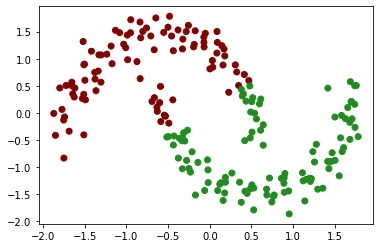

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import adjusted_rand_score

from sklearn.datasets import make_moons, load_wine
from sklearn.preprocessing import StandardScaler, scale

colors = ['maroon', 'forestgreen']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

features, true_labels = make_moons(n_samples=250, noise=0.05, random_state=42)

X_moons, y_moons = make_moons(n_samples=200, random_state=0, noise=.09)
X_moons = scale(X_moons)

kmeans = KMeans(n_clusters=2)
kmeans_moon = kmeans.fit(X_moons)

plt.scatter(X_moons[:,0], X_moons[:,1], c=vectorizer(kmeans.labels_))
print(adjusted_mutual_info_score(y_moons, kmeans_moon.labels_))
print(adjusted_rand_score(y_moons, kmeans_moon.labels_))

0.9399771891784398
0.9701455821492776


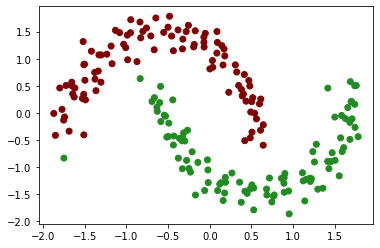

In [42]:
dbscan = DBSCAN(eps=0.3)
dbscan_moons = dbscan.fit(X_moons)
plt.scatter(X_moons[:,0], X_moons[:,1], c=vectorizer(dbscan.labels_))
print(adjusted_mutual_info_score(y_moons, dbscan_moons.labels_))
print(adjusted_rand_score(y_moons, dbscan_moons.labels_))

0.874579440437926
0.8974949815093207


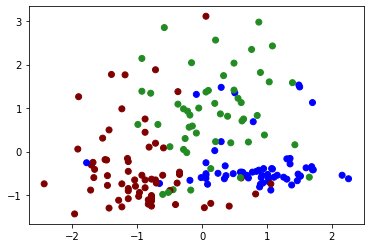

In [43]:
colors = ['maroon', 'forestgreen', 'blue']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

wine = load_wine()
dataset = pd.DataFrame(wine.data, columns=wine.feature_names)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataset)

kmeans = KMeans(n_clusters=3)
kmeans_wine = kmeans.fit(scaled_features)

plt.scatter(scaled_features[:,0], scaled_features[:,1], c=vectorizer(kmeans.labels_))
print(adjusted_mutual_info_score(wine.target, kmeans_wine.labels_))
print(adjusted_rand_score(wine.target, kmeans_wine.labels_))

1.1945610878944344e-15
0.0


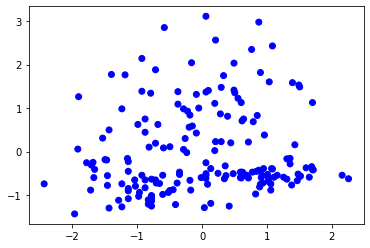

In [50]:
dbscan = DBSCAN(eps=0.1, min_samples=100)
dbscan_wine = dbscan.fit(scaled_features)
plt.scatter(scaled_features[:,0], scaled_features[:,1], c=vectorizer(dbscan.labels_))
print(adjusted_mutual_info_score(wine.target, dbscan_wine.labels_))
print(adjusted_rand_score(wine.target, dbscan_wine.labels_))